## Reading data and preprocessing

In [1]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from collections import defaultdict

In [3]:
def preprocessing_lists(row):
    row = row[1:-1] # Delete []
    row = row.replace(' ','') # Delete spaces
    row = row.split(',')
    row = [int(x) for x in row]
    return row

In [25]:
def read_data(name):
    simulation = pd.read_csv('data/{}.csv'.format(name))
    simulation.winners = simulation.winners.apply(preprocessing_lists)
    simulation.first_mid = simulation.first_mid.apply(preprocessing_lists)
    return simulation

In [5]:
simulation_100 = pd.read_csv('data/simulation_100.csv')
simulation_100.winners = simulation_100.winners.apply(preprocessing_lists)
simulation_100.first_mid = simulation_100.first_mid.apply(preprocessing_lists)

## 1. Is it a fair game?
### 1.1 Is it a fair game across games
We understand as a fair game as a game where each player can win with the same probability if we play enough games

In [6]:
# There are many configurations, we pick a lot of those configurations, and run many experiments, see who wins the most

distribution_winners = defaultdict(int)
def count_winners(row):
    for item in row:
        distribution_winners[item] += 1

simulation_100.winners.apply(count_winners)

0        None
1        None
2        None
3        None
4        None
         ... 
49995    None
49996    None
49997    None
49998    None
49999    None
Name: winners, Length: 50000, dtype: object

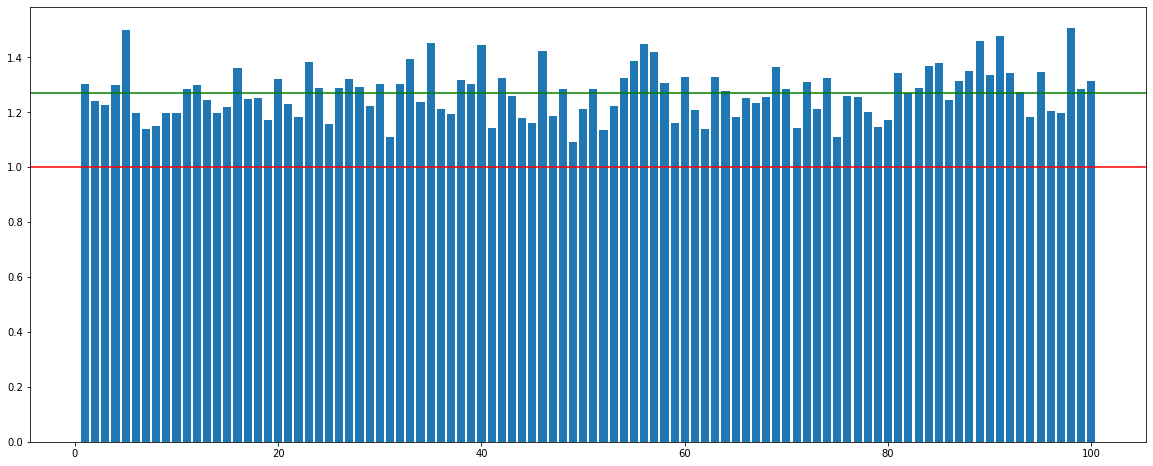

In [7]:
x = range(1,101)
y = [distribution_winners[i] / 50_000 * 100 for i in range(100)]
plt.figure(figsize=(20,8))
plt.bar(x,y)
plt.axhline(y = 1, color='r', linestyle='-')
plt.axhline(y = np.mean(y), color='g', linestyle='-')

In [ ]:
# Each one has more than 1% of probability of winning, but they seem fair, since variations are
# almost random

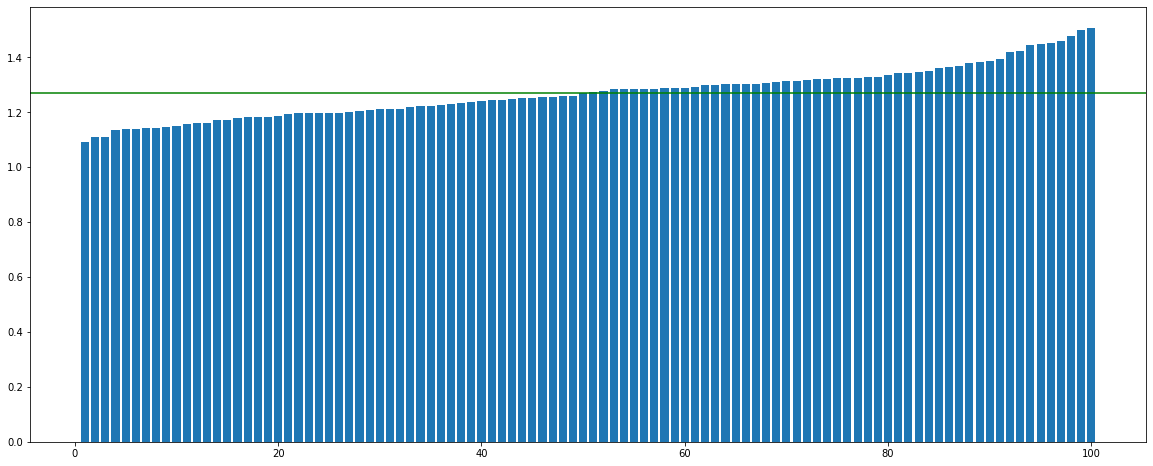

In [8]:
x = range(1,101)
y = [distribution_winners[i] / 50_000 * 100 for i in range(100)]
y.sort()
plt.figure(figsize=(20,8))
plt.bar(x,y)
plt.axhline(y = np.mean(y), color='g', linestyle='-')

In [10]:
# For 2 players
simulation_2 = pd.read_csv('data/simulation_2.csv')
simulation_2.winners = simulation_2.winners.apply(preprocessing_lists)
simulation_2.first_mid = simulation_2.first_mid.apply(preprocessing_lists)

In [12]:
distribution_winners = defaultdict(int)
simulation_2.winners.apply(count_winners)

0       None
1       None
2       None
3       None
4       None
        ... 
9995    None
9996    None
9997    None
9998    None
9999    None
Name: winners, Length: 10000, dtype: object

In [18]:
simulation_2.head()

,num_game,winners,num_cards_until_end,first_mid
0,0,"[0, 1]",54,[0]
1,0,[1],47,"[0, 1]"
2,0,[1],50,[0]
3,0,[0],51,[0]
4,0,[1],49,[0]


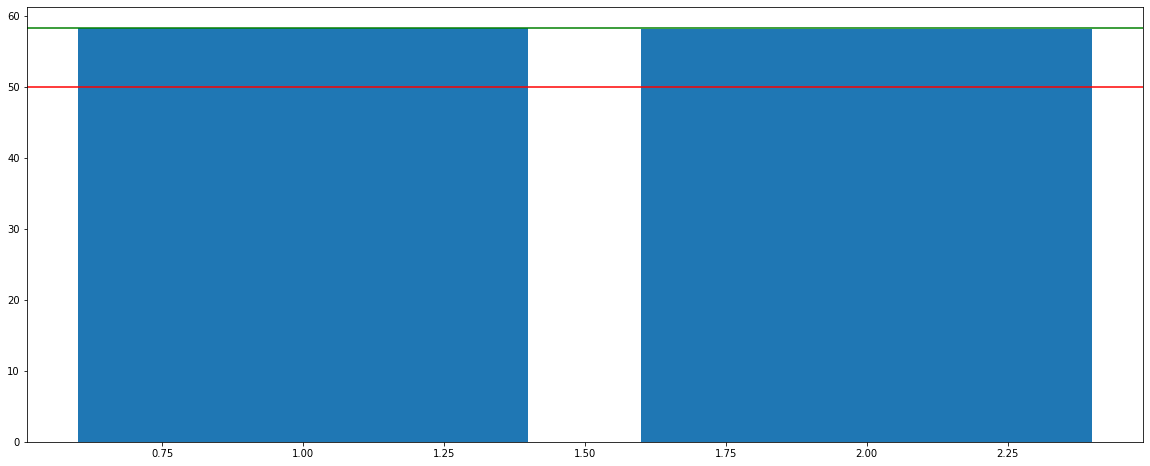

In [19]:
x = range(1,3)
y = [distribution_winners[i] / 10_000 * 100 for i in range(2)]
plt.figure(figsize=(20,8))
plt.bar(x,y)
plt.axhline(y = 50, color='r', linestyle='-')
plt.axhline(y = np.mean(y), color='g', linestyle='-')

## Expected number of cards withdrawn

In [29]:
mean_ = []
quant_95 = []
quant_5 = []
for i in range(2,11):
    simulation = read_data('simulation_{}'.format(i))
    mean_.append(simulation.num_cards_until_end.mean())
    quant_95.append(simulation.num_cards_until_end.quantile(0.05))
    quant_5.append(simulation.num_cards_until_end.quantile(0.95))

In [30]:
expected_cards = pd.DataFrame({'num_cards':np.arange(2,11),
                              'mean_':mean_,'quant_95':quant_95,
                              'quant_5':quant_5})
expected_cards

,num_cards,mean_,quant_95,quant_5
0,2,50.4339,45.0,54.0
1,3,49.6448,44.0,53.0
2,4,49.0093,44.0,53.0
3,5,48.4507,43.0,52.0
4,6,48.0963,43.0,52.0
5,7,47.8006,42.0,52.0
6,8,47.4140,42.0,51.0
7,9,47.1461,42.0,51.0
8,10,46.9333,41.0,51.0


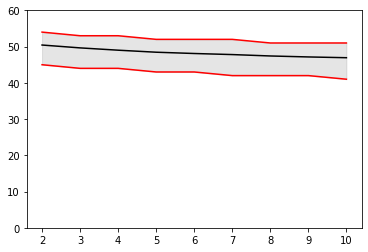

In [52]:
fig,ax = plt.subplots()
plt.plot(np.arange(2,11),expected_cards.quant_95,c='red')
plt.plot(np.arange(2,11),expected_cards.mean_, c='black')
plt.plot(np.arange(2,11),expected_cards.quant_5,c='red')
plt.ylim(0,60)
ax.fill_between(np.arange(2,11), expected_cards.quant_5, 
                expected_cards.quant_95, alpha=0.1, color = 'black')

In [53]:
# Model: To reach 20 avg
# Test it in 100

In [32]:
# With 100 I expect that someone will have "enough luck" to win quickly
simulation = read_data('simulation_{}'.format(100))
print('mean',simulation.num_cards_until_end.mean())
print('quant95',simulation.num_cards_until_end.quantile(0.05))
print('quant5',simulation.num_cards_until_end.quantile(0.95))

mean 41.91852
quant95 37.0
quant5 46.0


In [33]:
# Add 1000, is it enough?

## The amount of winners

In [56]:
for i in range(2,11):
    simulation = read_data('simulation_{}'.format(i))
    display(simulation.winners.apply(len).value_counts(normalize=True))

1    0.8363
2    0.1637
Name: winners, dtype: float64

1    0.8389
2    0.1187
3    0.0424
Name: winners, dtype: float64

1    0.8384
2    0.1300
3    0.0218
4    0.0098
Name: winners, dtype: float64

1    0.8282
2    0.1382
3    0.0260
4    0.0049
5    0.0027
Name: winners, dtype: float64

1    0.8275
2    0.1346
3    0.0284
4    0.0072
5    0.0014
6    0.0009
Name: winners, dtype: float64

1    0.8249
2    0.1370
3    0.0290
4    0.0067
5    0.0019
6    0.0004
7    0.0001
Name: winners, dtype: float64

1    0.8302
2    0.1332
3    0.0301
4    0.0052
5    0.0013
Name: winners, dtype: float64

1    0.8283
2    0.1345
3    0.0288
4    0.0062
5    0.0019
6    0.0003
Name: winners, dtype: float64

1    0.8197
2    0.1409
3    0.0300
4    0.0067
5    0.0019
6    0.0006
7    0.0002
Name: winners, dtype: float64

- Event of having more than 1 winner has more than 15% chance in any game with players from 2 to 10
- As we add more players, results seem to stabilize, maybe there is an underlying known distribution? Exponential?
- Of course, the most likely seems to be the group of 2, with ~13%

### Probability of winning per number of players
### The first one to reach mid has more advantage?    
### Can we compute it technically
### Tendency: When will it reach 16? Linear regression